 Import Libraries and Load Dataset:



In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

# Load California Housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


 Explore and Handle Missing Values/Outliers:

In [2]:
# Check for missing values
print(df.isnull().sum())

# Handle outliers (if any)
# You can use methods like z-score, IQR, or domain-specific knowledge.


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


Split the Dataset:

In [3]:
# Split into features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Standardize Data:

In [4]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


 Linear Regression:

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
lr_predictions = lr_model.predict(X_test_scaled)

# Evaluate the model
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print("Linear Regression Metrics:")
print("Mean Squared Error:", lr_mse)
print("R2 Score:", lr_r2)


Linear Regression Metrics:
Mean Squared Error: 0.5558915986952442
R2 Score: 0.575787706032451


Artificial Neural Network (ANN):

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize and train ANN model
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
ann_model.add(Dense(1, activation='linear'))

ann_model.compile(optimizer='adam', loss='mean_squared_error')
ann_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

# Make predictions on the testing set
ann_predictions = ann_model.predict(X_test_scaled).flatten()

# Evaluate the model
ann_mse = mean_squared_error(y_test, ann_predictions)
ann_r2 = r2_score(y_test, ann_predictions)

print("\nArtificial Neural Network Metrics:")
print("Mean Squared Error:", ann_mse)
print("R2 Score:", ann_r2)


129/129 [==============================] - 0s 3ms/step

Artificial Neural Network Metrics:
Mean Squared Error: 0.30438159003097803
R2 Score: 0.7677201582977693


Comparison and Analysis:

In [ ]:
# Compare the performance metrics
print("\nComparison:")
print("Linear Regression MSE:", lr_mse)
print("ANN MSE:", ann_mse)
print("Linear Regression R2 Score:", lr_r2)
print("ANN R2 Score:", ann_r2)


Visualization:

Scatter Plots:

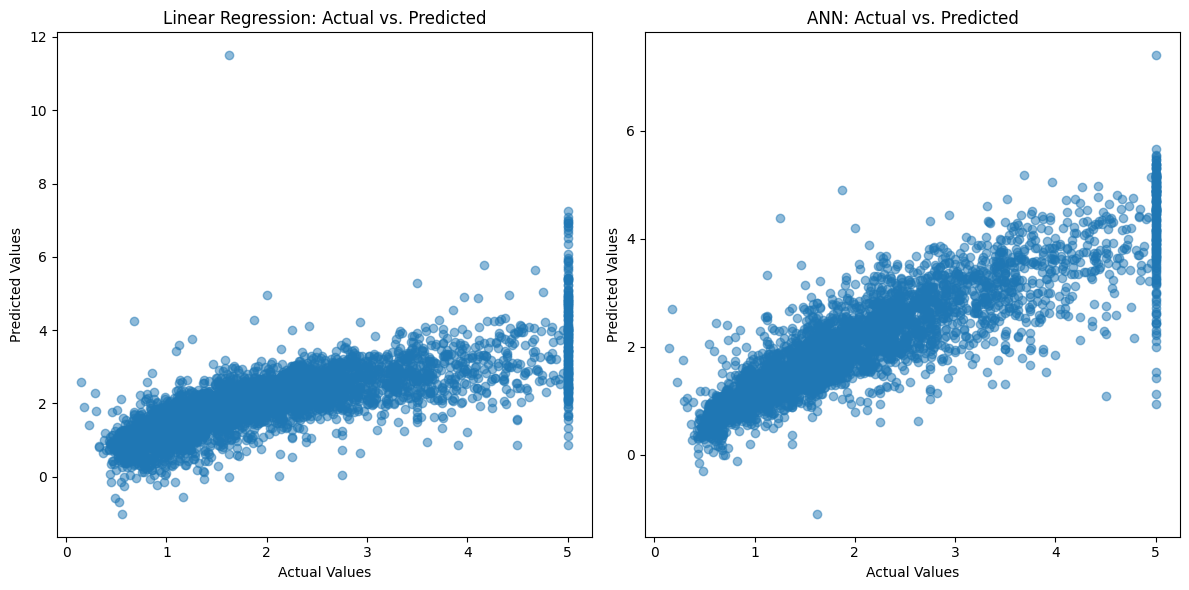

In [8]:
import matplotlib.pyplot as plt

# Scatter plot for Linear Regression
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_predictions, alpha=0.5)
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Scatter plot for ANN
plt.subplot(1, 2, 2)
plt.scatter(y_test, ann_predictions, alpha=0.5)
plt.title('ANN: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()


Visualizing the Architecture of ANN using TensorBoard:

In [9]:
from tensorflow.keras.callbacks import TensorBoard
import datetime

# Create a directory for TensorBoard logs
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the ANN model with TensorBoard callback
ann_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), callbacks=[tensorboard_callback])

# Start TensorBoard in your terminal
# tensorboard --logdir logs/fit


Epoch 1/50
516/516 [==============================] - 3s 5ms/step - loss: 0.2917 - val_loss: 0.3038
Epoch 2/50
516/516 [==============================] - 2s 3ms/step - loss: 0.2884 - val_loss: 0.3083
Epoch 3/50
516/516 [==============================] - 2s 3ms/step - loss: 0.2980 - val_loss: 0.3145
Epoch 4/50
516/516 [==============================] - 2s 3ms/step - loss: 0.2918 - val_loss: 0.3025
Epoch 5/50
516/516 [==============================] - 2s 3ms/step - loss: 0.2916 - val_loss: 0.3051
Epoch 6/50
516/516 [==============================] - 1s 2ms/step - loss: 0.2880 - val_loss: 0.3114
Epoch 7/50
516/516 [==============================] - 1s 3ms/step - loss: 0.2893 - val_loss: 0.3066
Epoch 8/50
516/516 [==============================] - 1s 3ms/step - loss: 0.2941 - val_loss: 0.3025
Epoch 9/50
516/516 [==============================] - 1s 2ms/step - loss: 0.2895 - val_loss: 0.3048
Epoch 10/50
516/516 [==============================] - 1s 3ms/step - loss: 0.2956 - val_loss: 0.3055